<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 8</h1>

In questo notebook sono riportati gli esercizi da compiere con il codice fornito nella cartella **md.8**: i grafici presenti sono in python, ma nella cartella è presente anche un file .gnuplot contenente i comandi necessari per effettuare gli stessi plot in python. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
<center>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

In [2]:
kb = 0.086
T = 300

<center>

## Energia libera

</center>

L'energia libera di un sistema è l'energia disponibile per compiere lavoro utile alle specifiche condizioni termodinamiche considerate. Dall'energia libera è possibile ricavare l'intera termodinamica di un sistema e classificare le transizioni di fase alle quali lo stesso è sottoposto studiandone le derivate. Consideriamo il caso dell'energia libera di Helmholtz, che è definita a partire dalla funzione di partizione canonica come segue

$$
F\left(N,\,V,\,T\right)\,=\,-k_BT\log{\left[Z\left(N,\,V,\,T\right)\right]}
$$

dove per ottenere la $Z$ abbiamo integrato il peso statistico di Boltzmann sullo spazio delle fasi

$$
Z\left(N,\,V,\,T\right)\,=\,\int \frac{d^{3N}q d^{3N}q}{h^{3N}N!}\exp{\left[-H\left(p,\,q\right)/k_BT\right]}.
$$

L'energia libera così definita non contiene informazioni relative allo stato configurazionale del sistema, ma è tuttavia possibile introdurre una nuova definizione di $F$, che va a dipendere anche dalle possibili conformazioni dello stato che si realizza. Abbiamo quindi che 

$$
F\left(\Upsilon,T\right)\,=\,-k_BT\log{\left\{\int_{\Upsilon\left(r\right)} \frac{d^{3N}q d^{3N}q}{h^{3N}N!}\exp{\left[-H\left(p,\,q\right)/k_BT\right]}\right\}},
$$

dove $\Upsilon\left(\vec{r}\right)$ è una qualche proprietà configurazionale del sistema, come per esempio configurazioni folded o unfolded di una catena di atomi interagenti fra loro con potenziali armonici e Lennard-Jones. L'importanza dell'energia libera è legata anche al fatto che consente di identificare gli stati più popolati, corrispondenti ai minimi della stessa $F$. Questo studio va effettuato con attenzione, considerando che proiettare la $F$ su una singola variabile può portare a risultati sensibilmente errati.

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 3.1</h1>

L'obiettivo di questo esercizio è determinare l'energia libera per una catena costituita da 60 masse collegate da molle, in presenza di ulteriori interazioni tipo Lennard-Jones. Il sistema è mantenuto a temperatura costante per mezzo di un termostato di Langevin: la simulazione è caratterizzata da $T\,=\,300\,K$. Identifichiamo due parametri d'ordine che consentono di caratterizzare il sistema, come

1. il raggio di girazione $R_g$, che descrive come le componenti di un oggetto sono distribuite attorno al suo asse di rotazione

2. la distanza $q$ fra la testa e la coda della catena presa in considerazione

Effettuiamo una simulazione lunga, che consente di studiare 20 ns di evoluzione della catena. E' necessario scartare la prima fase (100 ps) della simulazione, per non considerare nella nostra analisi la fase di transitorio necessaria per scorrelarsi dalla condizione iniziale. Ci interessiamo inizialmente alla probabilità di ottenere una certa coppia di valori per i parametri d'ordine precedentemente introdotti, effettuando un binning dei risultati simulativi.

/tmp/ipykernel_65579/3649054381.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, ax=ax, label='Densità di probabilità')


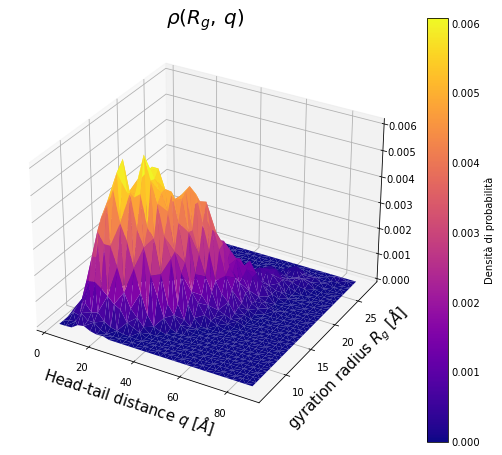

In [ ]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('2Dbinning/2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Probabilità')
plt.show()

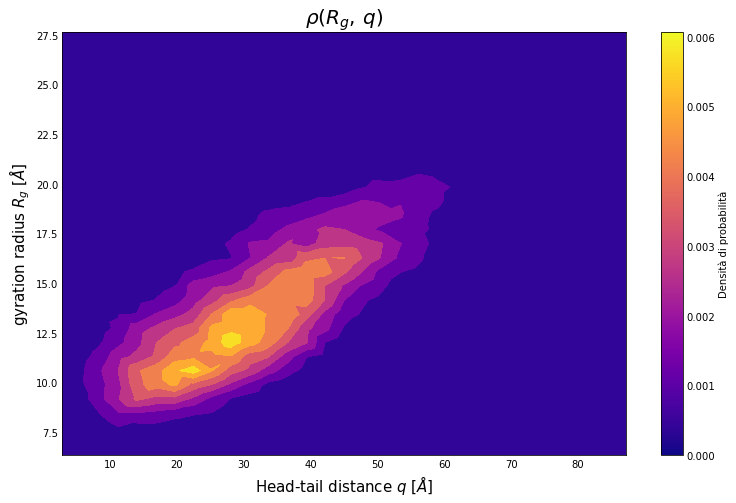

In [ ]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('2Dbinning/2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Probabilità')
plt.show()

Osserviamo come le configurazioni più visitate dal sistema si posizionano lungo una retta dotata di coefficiente angolare positivo; tali stati maggiormente visitati durante la simulazione costituiranno i minimi dell'energia libera, la quale si può ottenere come 

$$
F\left(\Upsilon\left(\vec{r}\right)\right)\,=\,-k_BT\log{\left(p\left(\Upsilon\right)\right)}\,-\,k_BT\log{\left(Z\right)}.
$$

La funzione di partizione compare nella relazione precedente come un offset irrilevante in energia e per questo motivo può essere scartato. Lavoriamo quindi ora applicando il logaritmo al risultato ottenuto in precedenza.

/tmp/ipykernel_65579/203060624.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, ax=ax, label='Energia libera')


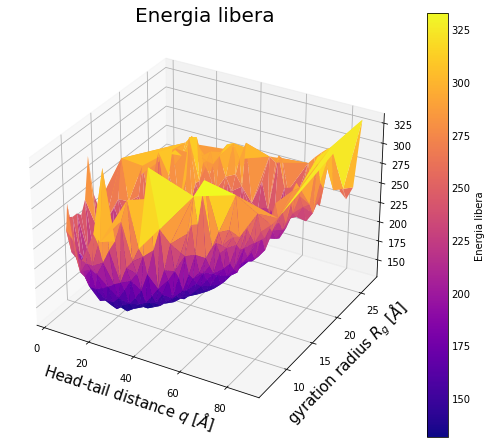

In [5]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('2Dbinning/2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kb*T*np.log(z[mask])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Energia libera')
plt.show()

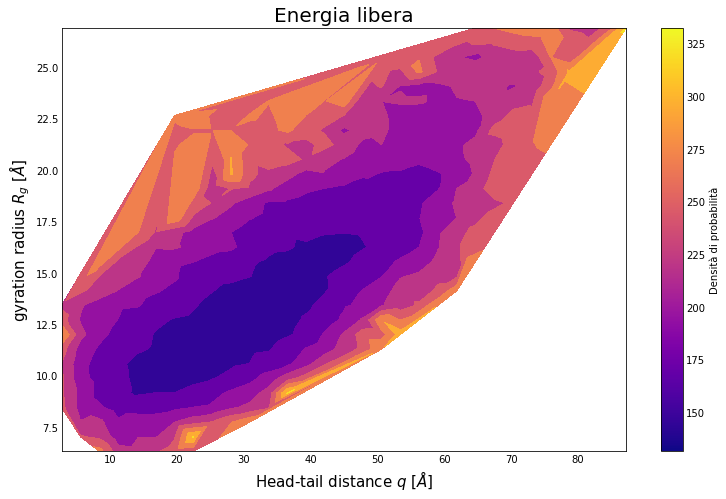

In [ ]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('2Dbinning/2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kb*T*np.log(z[mask])

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Energia libera')
plt.show()

Osserviamo quanto anticipato, ossia che gli stati maggiormente visitati sono queli dotati di energia libera inferiore.

## Studio diretto su un solo parametro d'ordine

Consideriamo ora singolarmente il raggio di girazione e la distanza fra testa e coda della catena come parametro d'ordine per il sistema in analisi. Iniziamo con un binning per valutare quali siano le configurazioni più visitate dal nostro sistema nella sua evoluzione, per poi calcolare l'energia libera.

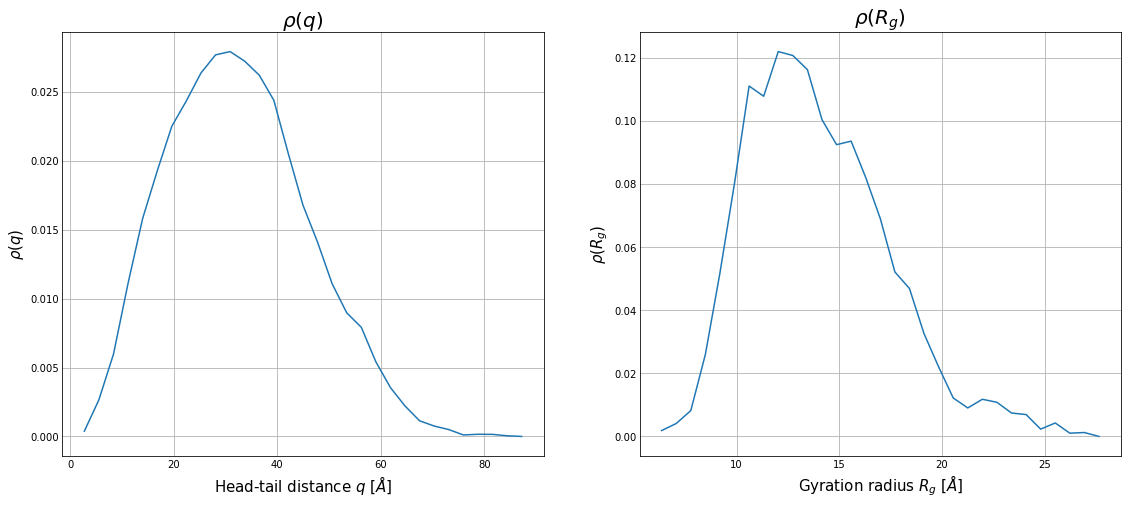

In [7]:
fig = plt.figure(figsize=(15, 6))

# Grafico 1 --> Marginalizzo su head-tail distance q
ax1 = fig.add_subplot(1, 2, 1)
bin_q = np.loadtxt('1Dbinning/1D_q_binning.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1])
ax1.set_ylabel(r"$\rho\left(q\right)$", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(q\right)$", fontsize = 20)
ax1.grid(True)


# Grafico 2 --> Marginalizzo su gyration radius
ax2 = fig.add_subplot(1, 2, 2)
bin_Rg = np.loadtxt('1Dbinning/1D_Rg_binning.dat')
ax2.plot(bin_Rg[:, 0], bin_Rg[:, 1])
ax2.set_ylabel(r"$\rho\left(R_g\right)$", fontsize = 15)
ax2.set_xlabel(r"Gyration radius $R_g$ [$\AA$]", fontsize = 15)
ax2.set_title(r"$\rho\left(R_g\right)$", fontsize = 20)
ax2.grid(True)

plt.show()

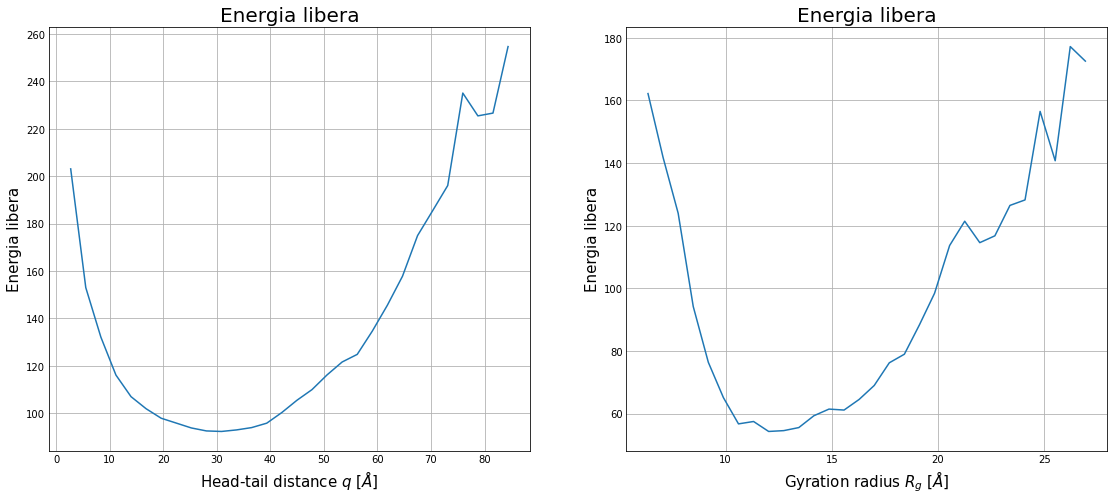

In [8]:
fig = plt.figure(figsize=(15, 6))

# Grafico 1 --> Marginalizzo su head-tail distance q
bin_q = np.loadtxt('1Dbinning/1D_q_binning.dat')
x = bin_q[:, 0]; y = bin_q[:, 1]
mask = y > 1e-5; x = x[mask]; y = y[mask]; y = -kb * T * np.log(y)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, y)
ax1.set_ylabel(r"Energia libera", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"Energia libera", fontsize = 20)
ax1.grid(True)


# Grafico 2 --> Marginalizzo su gyration radius
bin_Rg = np.loadtxt('1Dbinning/1D_Rg_binning.dat')
x = bin_Rg[:, 0]; y = bin_Rg[:, 1]
mask = y > 1e-5; x = x[mask]; y = y[mask]; y = -kb * T * np.log(y)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, y)
ax2.set_ylabel(r"Energia libera", fontsize = 15)
ax2.set_xlabel(r"Gyration radius $R_g$ [$\AA$]", fontsize = 15)
ax2.set_title(r"Energia libera", fontsize = 20)
ax2.grid(True)

plt.show()

## Marginalizzazione ad un solo parametro d'ordine

Proviamo ora a integrare sul raggio di girazione in modo tale da ottenere un'energia libera con dipendenza solamente sulla distanza fra il primo e l'ultimo elemento della catena. Quanto otterremo in questa fase deve essere confrontato con un campionamento diretto dell'energia libera in funzione di $q$, poichè il procedimento di proiezione può portare a conlusioni non fisiche e sensibilmente errate.

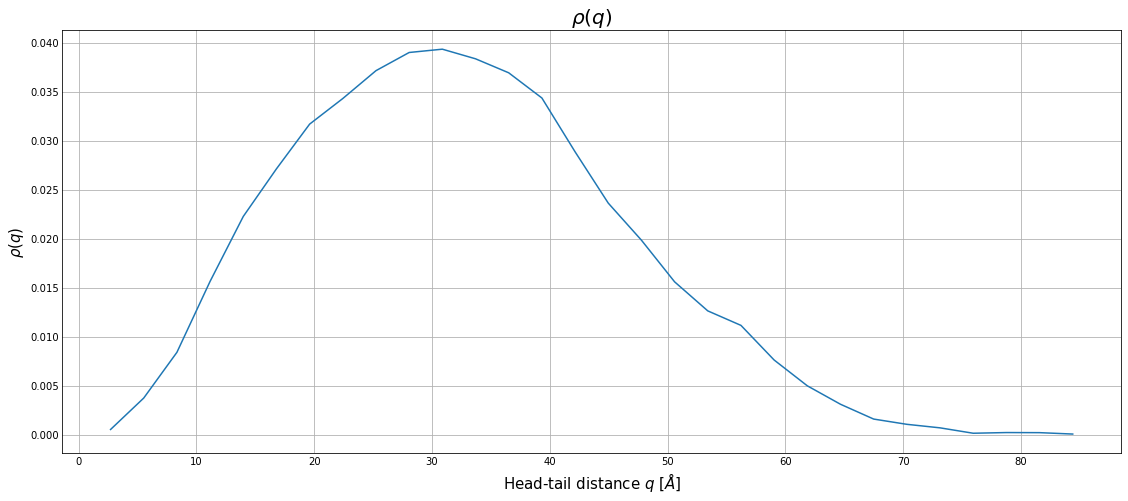

In [9]:
fig = plt.figure(figsize=(15, 6))

# Grafico 1 --> Marginalizzo su head-tail distance q
ax1 = fig.add_subplot(1, 1, 1)
bin_q = np.loadtxt('1Dbinning/1Dprob_proj_q.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1])
ax1.set_ylabel(r"$\rho\left(q\right)$", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(q\right)$", fontsize = 20)
ax1.grid(True)

plt.show()

## Confronto fra metodi

Procediamo ora a confrontare i risultati ottenuti con i due metodi precedenti.

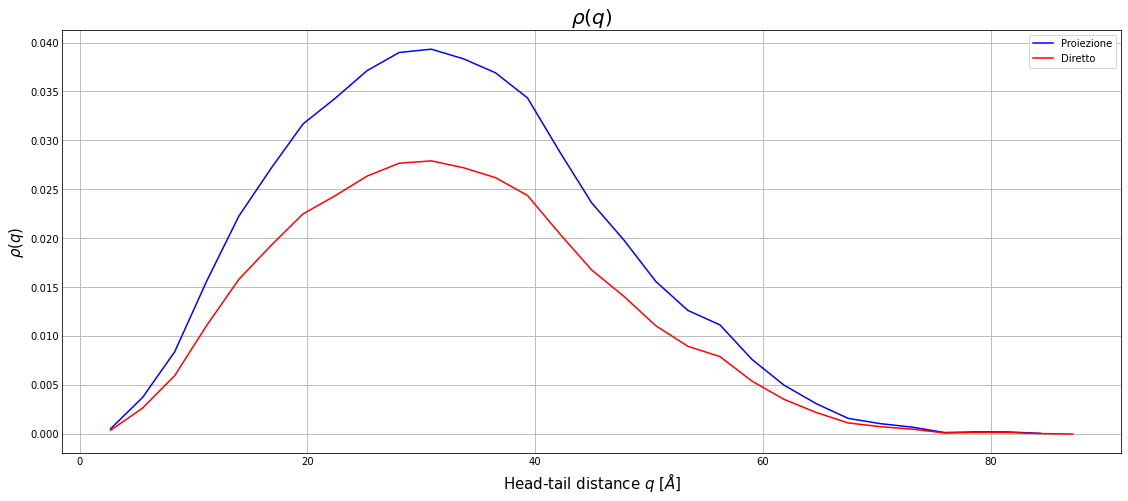

In [10]:
fig = plt.figure(figsize=(15, 6))

# Grafico 1 --> Marginalizzo su head-tail distance q
ax1 = fig.add_subplot(1, 1, 1)
bin_q = np.loadtxt('1Dbinning/1Dprob_proj_q.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1], color = 'blue', label = 'Proiezione')
bin_q = np.loadtxt('1Dbinning/1D_q_binning.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1], color = 'red', label = 'Diretto')

ax1.set_ylabel(r"$\rho\left(q\right)$", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(q\right)$", fontsize = 20)
ax1.grid(True)
ax1.legend(loc = 'best')

plt.show()

Notiamo che le due curve differiscono fra loro per una costante moltiplicativa, che è dovuta ad una mancata normalizazzione in fase di integrazione. Tale costante numerica è $k\,=\,1.4$.

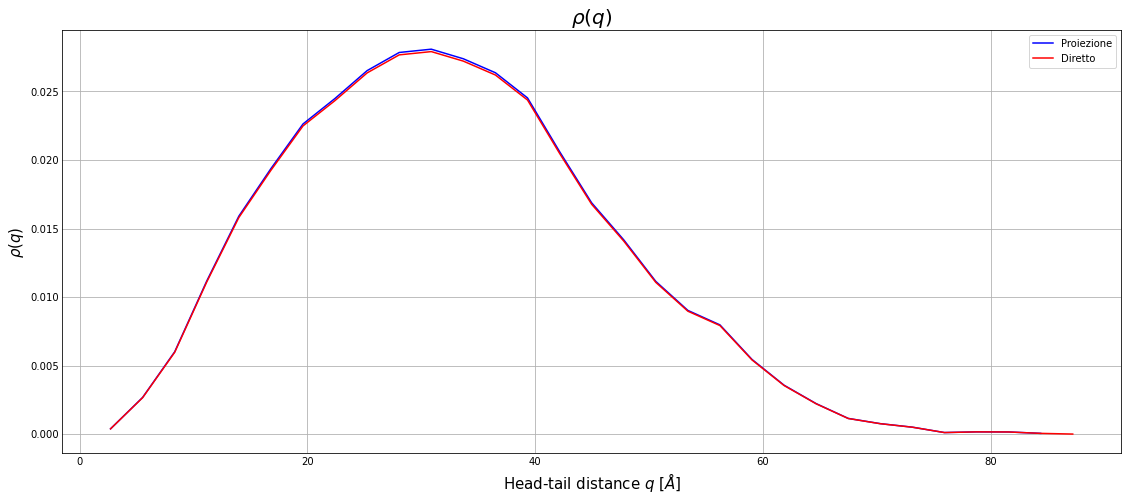

In [11]:
fig = plt.figure(figsize=(15, 6))

# Grafico 1 --> Marginalizzo su head-tail distance q
ax1 = fig.add_subplot(1, 1, 1)
bin_q = np.loadtxt('1Dbinning/1Dprob_proj_q.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1]/1.4, color = 'blue', label = 'Proiezione')
bin_q = np.loadtxt('1Dbinning/1D_q_binning.dat')
ax1.plot(bin_q[:, 0], bin_q[:, 1], color = 'red', label = 'Diretto')

ax1.set_ylabel(r"$\rho\left(q\right)$", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(q\right)$", fontsize = 20)
ax1.grid(True)
ax1.legend(loc = 'best')

plt.show()